In [1]:
import sys
sys.path.append('../')
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from helpers.products import Products
from directed_graph_generators.directed_tree import DirectedTree

from clustering_algorithms.exponential_clustering import Exponential_Clustering, Exponential_Clustering_no_evecs
from clustering_algorithms.zanetti_clustering import DSBM_Clustering_Zanetti

In [48]:
downwards_binary_tree = DirectedTree(3, 2).adjacency_matrix
three_cycle = np.array([[0,1,0],[0,0,1],[1,0,0]])

graph_adj = Products.tensor_product(np.eye(len(downwards_binary_tree)),downwards_binary_tree)
graph_adj+= + Products.tensor_product(three_cycle, np.ones(len(downwards_binary_tree),len(downwards_binary_tree)))
true_clusters = np.array([len(downwards_binary_tree)*[i] for i in range(len(three_cycle))]).flatten()

TypeError: Cannot interpret '3' as a data type

<AxesSubplot: >

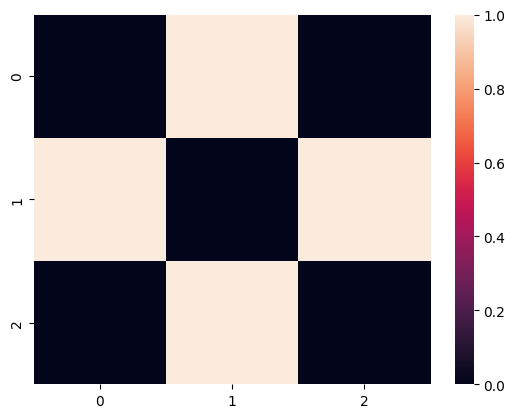

In [53]:
#sns.heatmap(Products.tensor_product(three_cycle,np.ones((len(downwards_binary_tree),len(downwards_binary_tree)))))
sns.heatmap(three_cycle)

<AxesSubplot: >

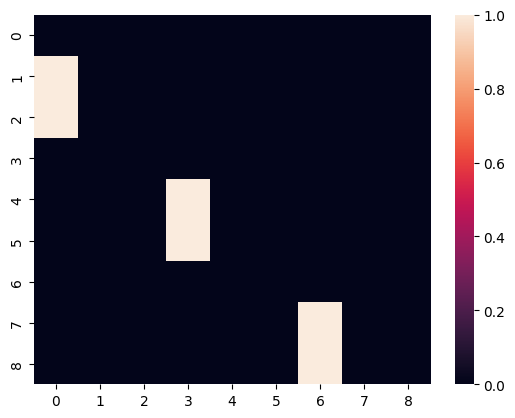

In [47]:
#look at adjacency_matrix heatmap
sns.heatmap(graph_adj)

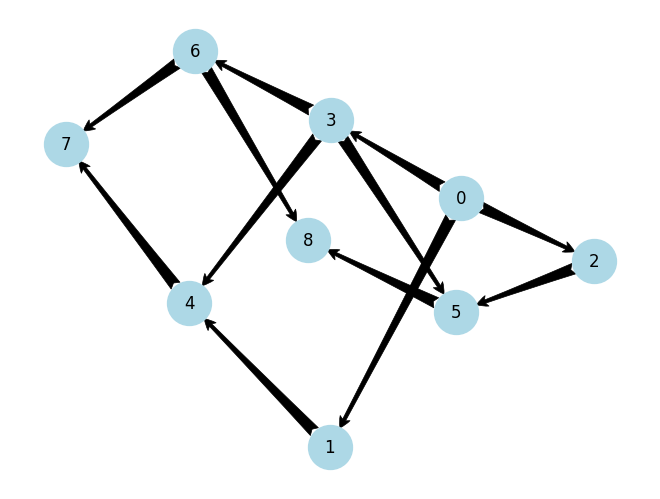

In [37]:
#drawing graph
import networkx as nx
from networkx import convert_matrix
G = convert_matrix.from_numpy_array(graph_adj)
#draw graph with directed edges
nx.draw(G, with_labels=True, arrows=True, node_size=1000, node_color='lightblue',arrowsize=20,arrowstyle='fancy', width=0.5)

In [ ]:
# trying Zanetti clustering
ec_no_evecs_clusters, cos_A = Exponential_Clustering_no_evecs(graph_adj,K=3,t=10)
print(len(ec_no_evecs_clusters))
ec_no_evecs_ari = adjusted_rand_score(true_clusters,ec_no_evecs_clusters)
# Zanetti Clustering
zc_clusters,_ = DSBM_Clustering_Zanetti(A,K=k,l=1,method='adjacency',normalize=True)
zc_ari = adjusted_rand_score(true_clusters,zc_clusters)